# Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Load dataset

In [2]:
df=pd.read_csv("drug200.csv")
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [3]:
df.shape

(200, 6)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [5]:
df.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


# Data Visualisation

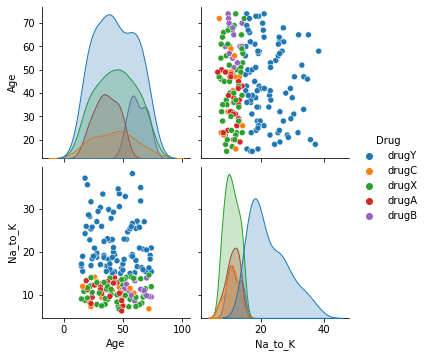

In [6]:
sns.pairplot(df,hue='Drug')

<AxesSubplot:>

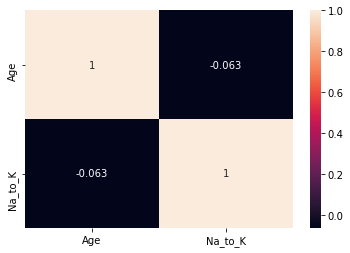

In [7]:
sns.heatmap(df.corr(),annot=True)

convert some categorical columns to numerical

In [8]:
sex=pd.get_dummies(df['Sex'],drop_first=True)
bp=pd.get_dummies(df['BP'],drop_first=True)
cholestrol=pd.get_dummies(df['Cholesterol'],drop_first=True)

In [9]:
df.drop(['Sex','BP','Cholesterol'],axis=1,inplace=True)
df=pd.concat([df,sex,bp,cholestrol],axis=1)
df.head()

,Age,Na_to_K,Drug,M,LOW,NORMAL,NORMAL
0,23,25.355,drugY,0,0,0,0
1,47,13.093,drugC,1,1,0,0
2,47,10.114,drugC,1,1,0,0
3,28,7.798,drugX,0,0,1,0
4,61,18.043,drugY,0,1,0,0


# Train the data

In [10]:
X=df[['Age','Na_to_K','M','LOW','NORMAL','NORMAL']]
y=df[['Drug']]

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=101)

In [13]:
print("Size of x_trainset is: ",X_train.shape)
print("Size of y_trainset is: ",y_train.shape)

Size of x_trainset is:  (140, 8)
Size of y_trainset is:  (140, 1)


In [14]:
print("Size of x_tesstset is: ",X_test.shape)
print("Size of y_testset is: ",y_test.shape)

Size of x_tesstset is:  (60, 8)
Size of y_testset is:  (60, 1)


# By Decision Tree

In [15]:
from sklearn.tree import DecisionTreeClassifier

In [16]:
drugTree= DecisionTreeClassifier(criterion="entropy", max_depth = 4)
drugTree # it shows the default parameters

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [17]:
drugTree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

# Prediction

In [18]:
predTree=drugTree.predict(X_test)

In [19]:
predTree

array(['drugX', 'drugY', 'drugB', 'drugY', 'drugA', 'drugY', 'drugB',
       'drugY', 'drugX', 'drugB', 'drugX', 'drugX', 'drugA', 'drugC',
       'drugY', 'drugC', 'drugY', 'drugX', 'drugX', 'drugX', 'drugY',
       'drugY', 'drugY', 'drugA', 'drugY', 'drugY', 'drugY', 'drugX',
       'drugY', 'drugC', 'drugY', 'drugY', 'drugY', 'drugY', 'drugB',
       'drugX', 'drugY', 'drugC', 'drugC', 'drugY', 'drugX', 'drugB',
       'drugA', 'drugY', 'drugB', 'drugC', 'drugA', 'drugY', 'drugY',
       'drugY', 'drugC', 'drugX', 'drugC', 'drugY', 'drugY', 'drugC',
       'drugA', 'drugY', 'drugY', 'drugX'], dtype=object)

In [20]:
from sklearn.metrics import classification_report,confusion_matrix

In [21]:
print(classification_report(y_test,predTree))
print(confusion_matrix(y_test,predTree))

              precision    recall  f1-score   support

       drugA       1.00      1.00      1.00         6
       drugB       1.00      1.00      1.00         6
       drugC       1.00      1.00      1.00         9
       drugX       1.00      0.92      0.96        13
       drugY       0.96      1.00      0.98        26

    accuracy                           0.98        60
   macro avg       0.99      0.98      0.99        60
weighted avg       0.98      0.98      0.98        60

[[ 6  0  0  0  0]
 [ 0  6  0  0  0]
 [ 0  0  9  0  0]
 [ 0  0  0 12  1]
 [ 0  0  0  0 26]]
